# Assignment 3.Exercise 5: Neural network playground (VG exercise)

In this Exercise 5 I decide to use the handwriting digits in the MNIST dataset.

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import warnings; warnings.simplefilter('ignore')

First I use the load_digits [1] convenience function in official sklearn documentation to load the MNIST dataset.

In [2]:
digits = load_digits()

In [3]:
X = digits.data
y = digits.target

## Network depth and Layer width 

For fully connected neural networks, there are three essential criteria that define the network’s architecture:

How many layers are there?
How many nodes are there in each of those layers?
What transfer/activation function is used at each of those layers?

There are other factors that can contribute to the performance of a neural network. These include which loss function is used, which optimization algorithm is used and etc. I’ve selected a common loss function called categorical cross entropy. plus, I’ve selected one of the simplest optimization algorithms: Stochastic Gradient Descent (SGD).

MLPClassifier on sklearn trains using Backpropagation. More precisely, it trains using some form of gradient descent and the gradients are calculated using Backpropagation. For classification, it minimizes the Cross-Entropy loss function,

I use MLPClassifier with three different sets of parameters for the neural network include 1. number of hidden layers 2. number of neurons per layer 3. activation functions.
First I start by a Network contains an input layer, a hidden layer with 150 units, a hidden layer with 100 units, and an output layer. I also increased the value of the regularization hyperparameter alpha argument. Also, I used 'lbfgs' as an optimizer in the family of quasi-Newton methods.
Finally I print the accuracies of the three cross validation fold.

### 1. First Set: 'number of hidden layers': 150,'number of neurons per layer': 100,'activation':logistic

In [4]:
clf1 = MLPClassifier(activation='logistic',
max_iter=1000000, hidden_layer_sizes=(150,100),alpha=0.1, solver='lbfgs')

In [5]:
clf1.fit(X, y)

MLPClassifier(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### Visualization of MLP weights on MNIST 

I've tried to Visualization of MLPClassifier weights on MNIST using code in sklearn documentation [2]. 

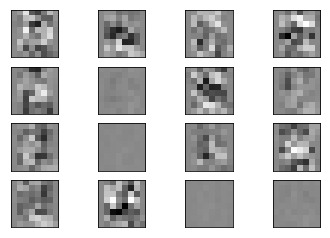

In [24]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = clf1.coefs_[0].min(), clf1.coefs_[0].max()
for coef, ax in zip(clf1.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [6]:
print('Number of Layers: %s, Number of outputs: %s, loss function: %s' % (clf1.n_layers_, clf1.n_outputs_, clf1.loss_))
predictions = clf1.score(X, y)
print('Accuracy:', clf1.score(X, y))

Number of Layers: 4, Number of outputs: 10, loss function: 0.012198055135810359
Accuracy: 1.0


In [7]:
print(cross_val_score(clf1, X, y, n_jobs = -1))

[0.95182724 0.96661102 0.94463087]


We defined the input layer earlier as a vector with 784 entries, this is the data from the flattened 28x28 image. 
The second model has a single hidden layer with 32 nodes using the sigmoid activation function. The resulting architecture has 25,450 tunable parameters. From the input layer to the hidden layer there are 784*32 = 25,088 weights. The hidden layer has 32 nodes so there are 32 biases. This brings us to 25,088 + 32 = 25,120 parameters.

The network below has one hidden layer. This network is so shallow that it’s technically inaccurate to call it “deep learning”.

### 2. Second Set: 'number of hidden layers': 1, 'number of neurons per layer': 32, 'activation':relu

In [10]:
clf2 = MLPClassifier(activation='relu',
max_iter=10000, hidden_layer_sizes=(32,),alpha=0.1, solver='sgd')

In [11]:
clf2.fit(X, y)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [12]:
print('Number of Layers: %s, Number of outputs: %s, loss function: %s' % (clf2.n_layers_, clf2.n_outputs_, clf2.loss_))
predictions = clf2.score(X, y)
print('Accuracy:', clf2.score(X, y))

Number of Layers: 3, Number of outputs: 10, loss function: 0.0324339470102941
Accuracy: 0.998330550918197


In [13]:
print(cross_val_score(clf2, X, y, n_jobs = -1))

[0.92857143 0.92320534 0.91442953]


### 3. Third Set: 'number of hidden layers': 100, 'number of neurons per layer': 200, 'activation':tanh

In [14]:
clf3 = MLPClassifier(activation='tanh',
max_iter=1000000, hidden_layer_sizes=(100,200),alpha=0.1, solver='lbfgs')

In [15]:
clf3.fit(X, y)

MLPClassifier(activation='tanh', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 200), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
print('Number of Layers: %s, Number of outputs: %s,  loss function: %s' % (clf3.n_layers_, clf3.n_outputs_, clf3.loss_))
predictions = clf3.score(X, y)
print('Accuracy:', clf3.score(X, y))

Number of Layers: 4, Number of outputs: 10,  loss function: 0.0030616733930209205
Accuracy: 1.0


In [17]:
print(cross_val_score(clf3, X, y, n_jobs = -1))

[0.95016611 0.97161937 0.93791946]


## Conclusion 

If we train long enough and have "too many" hidden layer units, then we will eventually have over-training. Usually, the goal is to find the smallest number of hidden units that can do reasonably well, as that will generally give you good generalization. In fact, there is the "bottle neck theory" that attempts to show this effect.

Adding more layers appears to have decreased the accuracy of the model. Overfitting is a problem with many machine learning tasks. Neural networks are especially prone to overfitting because of the very large number of tunable parameters. One sign that you might be overfitting is that the training accuracy is significantly better than the test accuracy.

Another knob we can turn is the number of nodes in each hidden layer. This is called the width of the layer. As with adding more layers, making each layer wider increases the total number of tunable parameters. Making wider layers tends to scale the number of parameters faster than adding more layers. Every time we add a single node to layer i, we have to give that new node an edge to every node in layer i+1.

Finally, because of the optimization algorithms work with neural networks, deeper networks require more training time.

### Reference 

[1] https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

[2] https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py